# Safepath

## Imagine que você foi convidade para desenvolver a mecânica de um novo jogo de estratégia.

## O estilo de mapa é um quadriculado onde não é possivel andar nas diagonais e o seu objetivo é calcular quantos caminhos com até X passos são possíveis, entre o herói e o tesouro, garantindo assim que o desafio é realizavel

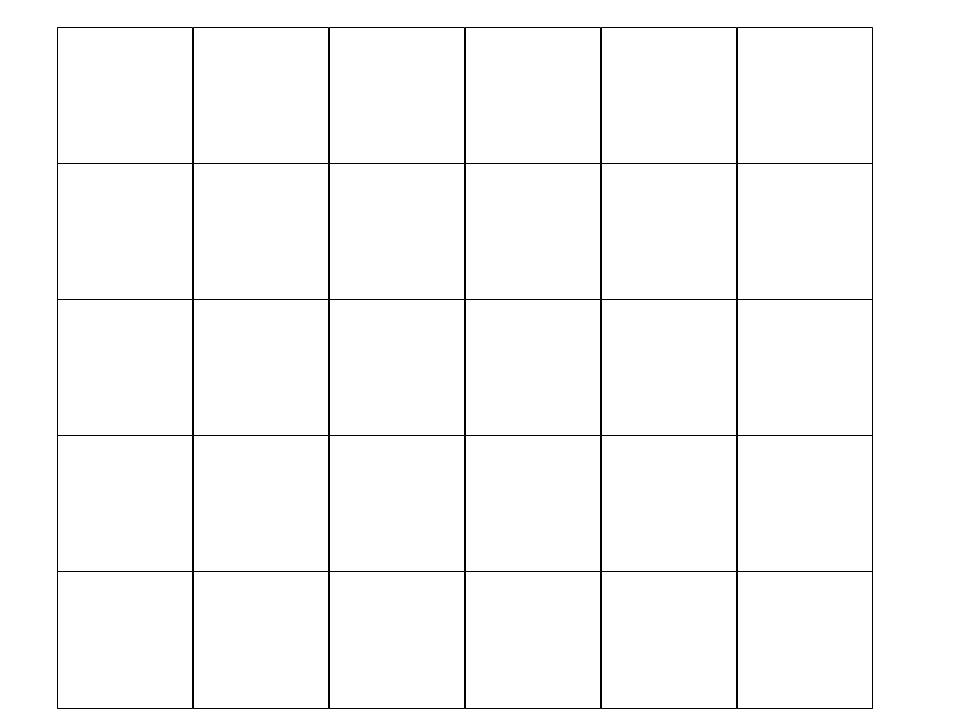

## Imagine que você inicie na primeira posição inferior esquerda (0,0)

In [31]:
import math

In [53]:
posicao_inicial = [0,0]

## E que o tesouro encontra-se na última posição superior direita (5,4)

In [34]:
tesouro = [5,4]

## Para definirmos de que forma iremos avançar, vamos calcular quantas possibilidades existem (_considerando sempre o menor caminho até 9 passos_)

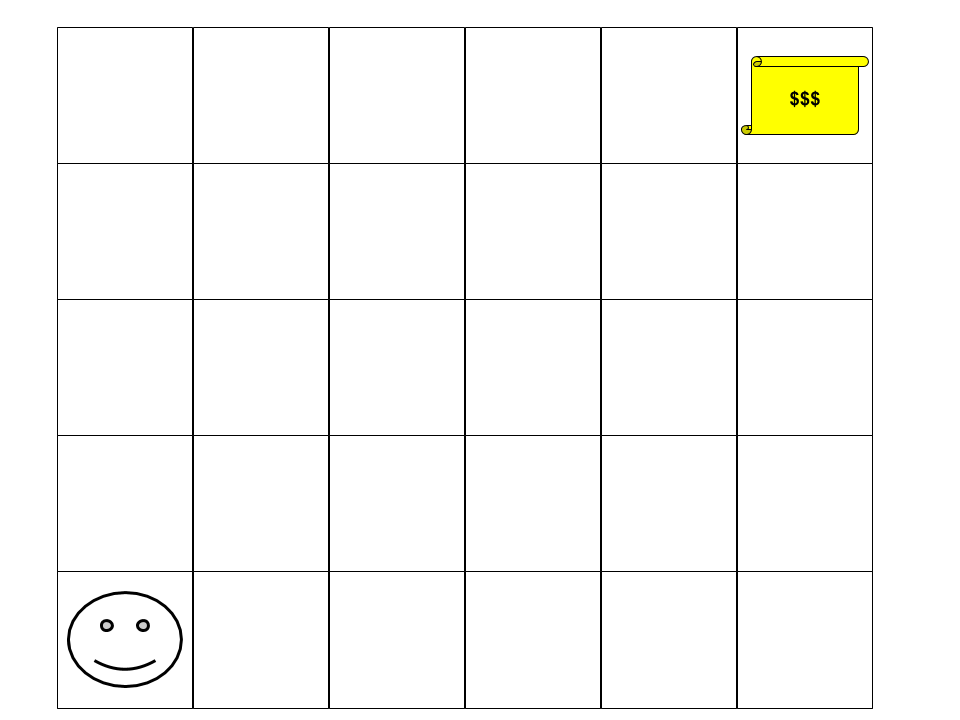

## Para determinarmos isso, observamos que qualquer uma das possibilidades precisa de 4 subidas e 5 deslocamentos para a direita

## Se olharmos desatentamente podemos pensar que o número de possibilidades seria 4 x 5, mas esse calculo se mostra equivocado

# < Permutação com repetição de termos >

## Nesse caso temos uma permutação com repetição, onde os elementos repetidos são 4(h) e 5(v), resultando no seguinte calculo:

### (nº total de deslocamentos)!/((nº deslocamentos horizontal)!*(nº deslocamentos vertical)!)

In [77]:
def possibilidades(origem, alvo):
    des_x = abs(alvo[0] - origem[0])
    des_y = abs(alvo[1] - origem[1])
    return math.factorial(des_x + des_y) / ( math.factorial(des_x) * math.factorial(des_y) )

### Pelos nossos calculos ficaria algo do tipo: 9!/(5! * 4!) ou seja 126

In [78]:
print(possibilidades(posicao_inicial, tesouro))

126.0


## Agora vamos adicionar um ponto bonus(3,3) pelo qual temos que passar para realizarmos 100% da fase

In [79]:
bonus = [3,3]

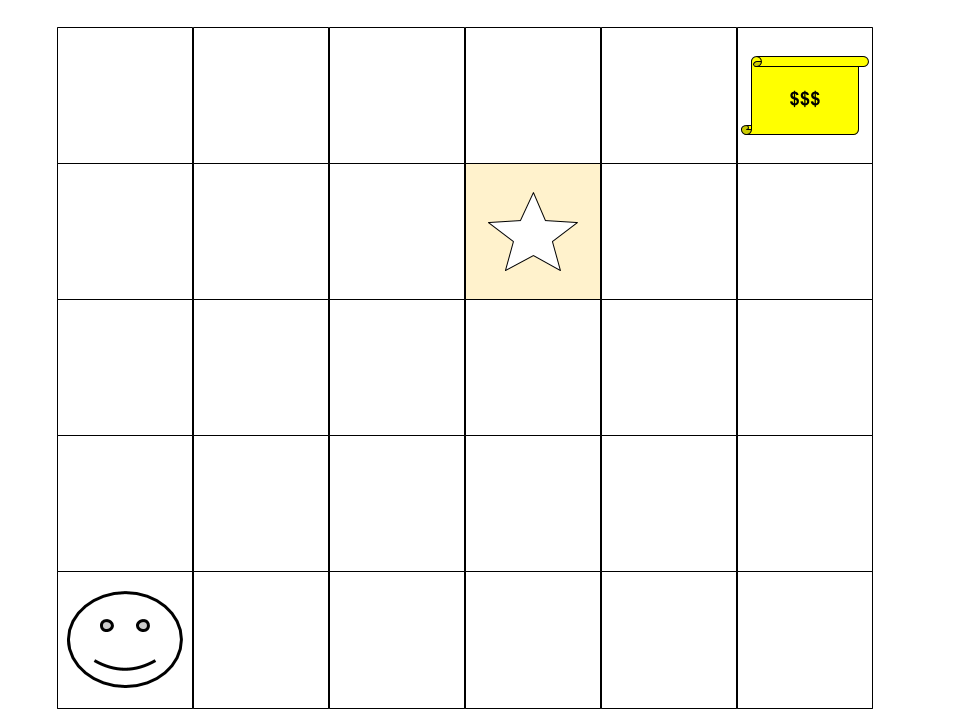

## Para calcularmos quantos caminhos possiveis existem que passem pelos dois pontos utilizaremos o ...

# < Principio da multiplicação >

## Vamos verificar quantos caminhos existem entre nossa posição e o bônus

In [81]:
inicial_bonus = possibilidades(posicao_inicial, bonus)
print(inicial_bonus)

20.0


## E quantos caminhos existem entre o bônus e o tesouro

In [83]:
bonus_tesouro = possibilidades(bonus, tesouro)
print(bonus_tesouro)

3.0


## Para cada caminho da posição inicial até o bônus é possivel escolher um dos caminhos entre o bônus e o tesouro para completar o circuito, o que resulta em: 20 * 3

In [103]:
inicial_bonus_tesouro = inicial_bonus * bonus_tesouro
print(inicial_bonus_tesouro)

60.0


## Vamos adicionar agora uma restrição entre as possibilidades de caminho no ponto(3,2)

In [85]:
restricao = [3,2]

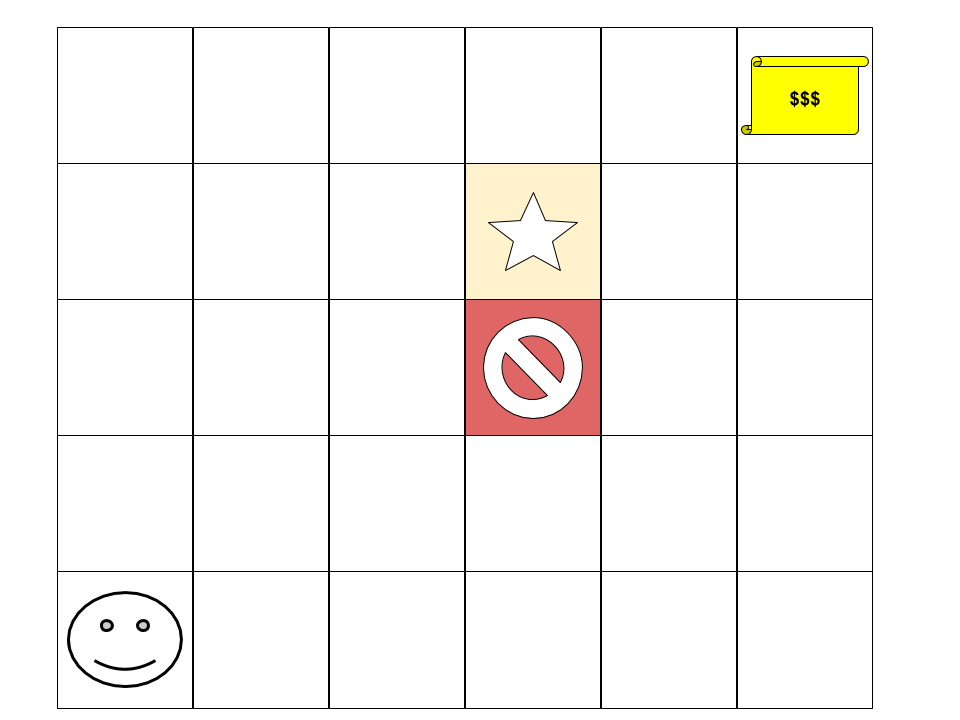

# Vamos então calcular quantos caminhos essa restrição irá nos afetar

In [87]:
inicial_restricao = possibilidades(posicao_inicial, restricao)
print(inicial_restricao)

10.0


In [88]:
restricao_bonus = possibilidades(restricao, bonus)
print(restricao_bonus)

1.0


## Considerando que devemos remover todos os caminhos que passam pela restrição no circuito até o bônus, temos denovo o principio da multiplicação: 10 * 1

In [94]:
inicial_restricao_bonus = inicial_restricao * restricao_bonus
print(inicial_restricao_bonus)

10.0


## Agora o nosso calculo deve desconsiderar esses caminhos até o tesouro: 10 * 3

In [97]:
inicial_restricao_bonus_tesouro = inicial_restricao_bonus * bonus_tesouro
print(inicial_restricao_bonus_tesouro)

30.0


## Essa restrição gerou um impacto de 50% dos nossos caminhos possiveis

In [104]:
print(inicial_restricao_bonus_tesouro / inicial_bonus_tesouro)

0.5


## Vamos agora adicionar uma nova restrição no ponto(1,1)

In [98]:
restricao_2 = [1,1]

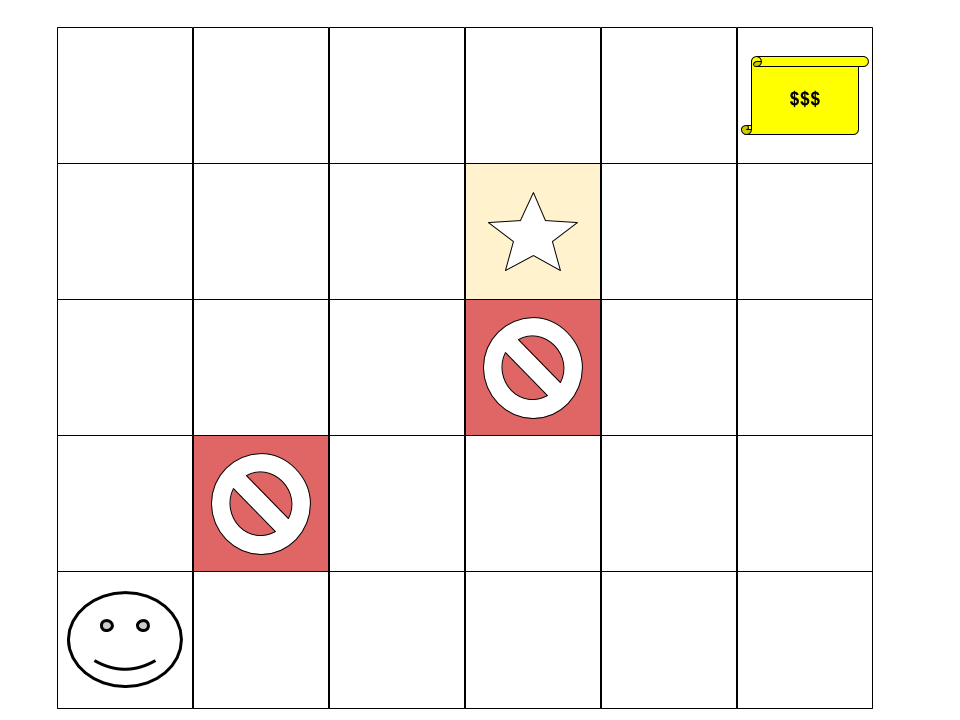

## Repetindo os calculos já realizados só que dessa vez para a nova restrição

In [99]:
inicial_restricao_2 = possibilidades(posicao_inicial, restricao_2)
print(inicial_restricao_2)

2.0


In [100]:
restricao_2_bonus = possibilidades(restricao_2, bonus)
print(restricao_2_bonus)

6.0


In [101]:
inicial_restricao_2_bonus = inicial_restricao_2 * restricao_2_bonus
print(inicial_restricao_2_bonus)

12.0


In [102]:
inicial_restricao_2_bonus_tesouro = inicial_restricao_2_bonus * bonus_tesouro
print(inicial_restricao_2_bonus_tesouro)

36.0


## A segunda restrição causou um impacto de 60% dos nossos caminhos possiveis

In [105]:
print(inicial_restricao_2_bonus_tesouro / inicial_bonus_tesouro)

0.6


## Agora para calcular o impacto das duas restrições em todos os nossos caminhos

## Primeiro vamos verificar os caminhos entre as duas restrições

In [107]:
restricao_2_restricao = possibilidades(restricao_2, restricao)
print(restricao_2_restricao)

3.0


## Agora vamos ver o caminho inteiro passando por todas as restrições

In [110]:
inicial_restricao_2_restricao_bonus_tesouro = inicial_restricao_2 * restricao_2_restricao * restricao_bonus * bonus_tesouro
print(inicial_restricao_2_restricao_bonus_tesouro)

18.0


# < Principio da inclusão-exclusão >

## O principio é utilizado pois ao contarmos os caminhos que passam por cada uma das restrições, contamos duas vezes os caminhos que passam entre as duas, assim sendo, temos que descontar eles uma vez

## Algo que ficaria na seguinte fórmula: |A| + |B| - |A ∩ B|

In [117]:
caminhos_restritos = inicial_restricao_bonus_tesouro + inicial_restricao_2_bonus_tesouro - inicial_restricao_2_restricao_bonus_tesouro
print(caminhos_restritos)

48.0


## O principio pode ser utilizado para quantas restrições quisermos adicionar, no caso de três restrições ficaria: 

## |A| + |B| + |C| - |A ∩ B| - |A ∩ C| - |C ∩ B| + |A ∩ B ∩ C|

## As duas restrições geraram um impacto de 80% nos nossos possiveis caminhos

In [119]:
print(caminhos_restritos / inicial_bonus_tesouro)

0.8


## Então ao todo a quantidade de caminhos possiveis são 12

In [120]:
print(inicial_bonus_tesouro - caminhos_restritos)

12.0
